## UCI SECOM(RandomForest)-2
#### Data preprocessing method: 결측값50%넘는 열 삭제후 남은 결측값은 fillna함수의 method='ffill'&'bfill'을 이용해 채운다. 이후 고유치 개수가 1인 열을 제거한다. 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('uci-secom.csv')

In [3]:
# Data shape 및 상위 5개 열 보기
print(data.shape)
data.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# include='all'하면 입력의 모든 열이 데이터 출력으로 포함, 기본값인 'None'은 수치데이터가 있는 열만 결과에 포함
data.describe(include='all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


## 1. Data Preprocessing

In [5]:
# Check data's Null values
data.isnull().any().any()

True

위의 결과를 통해 데이터에 결측값이 있다는 것을 확인했고, 결측값이 50% 이상인 열은 삭제하고, 나머지는 fillna의 method='ffill'을 통해 결측값을 앞 방향으로 채운 뒤

In [6]:
# Column에서 결측값의 percentage를 나타내는 함수 정의
# pd.concat->데이터 프레임 결합
# df.shape[0]은 데이터 전체 열의 개수
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [7]:
# Get rid of 'Time' column because it's meaningless
data=data.drop(['Time'],axis=1)

In [8]:
df_na = null_values(data)
df_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
...,...,...
456,1,0.063816
218,1,0.063816
356,1,0.063816
457,1,0.063816


In [9]:
# 결측값의 비율이 50% 넘는 열 개수 확인
df_na = df_na[df_na["Percentage (%)"] > 50]
df_na
df_na.shape

(28, 2)

In [10]:
# 결측값의 비율이 50% 넘는 열 확인
df_na.index

Index(['292', '293', '157', '158', '358', '85', '492', '220', '518', '246',
       '245', '516', '517', '110', '384', '382', '383', '109', '244', '111',
       '580', '578', '581', '579', '73', '72', '345', '346'],
      dtype='object')

In [11]:
# 결측값의 비율이 50% 넘는 열 삭제
data = data.drop(axis=1, columns=df_na.index)
data.shape

(1567, 563)

본래 592개의 열에서 50%가 넘는 28개의 열이 삭제됐음을 확인할 수 있음

In [12]:
# 나머지 열의 결측값은  나머지는 fillna의 method='ffill'과 'bfill'을 통해 결측값을 앞뒤 방향으로 채운다.
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,-0.0061,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [13]:
data.isnull().any().any()

False

결측값이 더이상 없음을 확인할 수 있다.

#### 추가로 고유값이 1개뿐인 열을 삭제하는 전처리 진행

In [14]:
# nunique() 함수를 써서 5열의 고유치 개수를 확인
data["5"].nunique()

1

In [15]:
# Column '5'와 같이 고유값이 1개인 열을 저장하는 unique_columns함수 생성
def unique_columns(df):
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [16]:
# 고유치 개수가 1개인 열의 개수 확인
len(unique_columns(data))

116

In [17]:
data.shape

(1567, 563)

In [18]:
data = data.drop(axis=1, columns=unique_columns(data))
data.shape

(1567, 447)

고유치 개수가 1개인 열 116개가 지워진 것을 확인할 수 있다.

### Data Scaling
- 1. StandardScaler 
- 2. PCA 차원축소

In [19]:
# Train/Test Dataset split을 위해 Dataset을 Data/Target값으로 분리
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [20]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample  = SMOTE(random_state=1).fit_sample(X, y.values.ravel())

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state=50)

(1) StandardScaler: 각 feature의 평균을 0, 분산을 1로 변경, 모든 feature들이 같은 Scale을 갖게된다.

In [22]:
y_train

array([ 1, -1,  1, ...,  1, -1,  1], dtype=int64)

#### ※ Scaler를 사용하기 전에 주의할 점
scaler는 fit과 transform 매서드를 지니고 있다. fit 매서드로 데이터 변환을 학습하고, transform 매서드로 실제 데이터의 스케일을 조정한다.
이때! fit 매서드는 학습용 데이터에만 적용해야한다. 그 후 transform 매서드를 학습용 데이터와 테스트 데이터에 적용한다.

In [23]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_train_sc = sc.fit_transform(X_train)
print('Features Min value before Scale : \n {}'. format(X_train.min(axis=0)))
print('Features Max value before Scale : \n {}'. format(X_train.max(axis=0)))
print('Features Min value after Scale : \n {}'. format(X_train_sc.min(axis=0)))
print('Features Max value after Scale : \n {}'. format(X_train_sc.max(axis=0)))
X_test_sc = sc.transform(X_test)

Features Min value before Scale : 
 1      2158.7500
2      2060.6600
3         0.0000
4         0.6815
6        82.1311
         ...    
585       1.2845
586      -0.0060
587       0.0032
588       0.0010
589       0.0000
Length: 445, dtype: float64
Features Max value before Scale : 
 1      2846.4400
2      2315.2667
3      3715.0417
4      1112.4728
6       129.2522
         ...    
585      99.3032
586       0.1028
587       0.0799
588       0.0286
589     737.3048
Length: 445, dtype: float64
Features Min value after Scale : 
 [-4.59693849e+00 -5.21855591e+00 -3.65246862e+00 -4.94534582e-02
 -3.46284616e+00 -2.00459449e+01 -4.38926545e+00 -3.87392042e+00
 -4.05116157e+00 -2.76505582e+01 -6.22659101e+00 -2.49312193e+00
 -2.01571114e+00 -9.08158150e-01 -3.73839158e+01 -8.42110939e+00
 -1.56323595e+01 -1.50629790e+01 -2.09743849e+00 -7.36140792e+00
 -4.56617017e+00 -5.62079276e+00 -5.64337705e+00 -7.25056305e+00
 -4.62756057e+00 -2.97373008e+00 -4.32739559e+00 -4.75654471e+00
 -3.2236

(2) PCA차원축소

- 많은 feature로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
-  일반적으로 차원이 증가할수록, 즉 feature가 많아질수록 예측 신뢰도가 떨어지고, 과적합(overfitting)이 발생하고, 개별 feature간의 상관관계가 높을 가능성이 있음

In [24]:
from sklearn.decomposition import PCA
# Initializing PCA and fitting
# Choose minimum number of PCA features that 85% variance is retained to avoid overfitting
pca = PCA(0.85)
X_sc_pca = pca.fit_transform(X_sc) # StandardScaler에서 학습용 데이터에 적용한 것처럼 fit과 transform 둘 다를 적용해줘야 하네~~??

In [25]:
# Transform train and test datasets
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print('PCA차원 축소 이전 X_train:', X_train_sc.shape)
print('PCA차원 축소 이전 X_test:', X_test_sc.shape)
print('PCA차원 축소 이후 X_train:', X_train_pca.shape)
print('PCA차원 축소 이후 X_test:', X_test_pca.shape)

PCA차원 축소 이전 X_train: (2194, 445)
PCA차원 축소 이전 X_test: (732, 445)
PCA차원 축소 이후 X_train: (2194, 105)
PCA차원 축소 이후 X_test: (732, 105)


PCA차원 축소로 Feature가 446개에서 105개로 줄어 차원이 감소 됐음을 확인 할 수 있다.

## 2. Data Modeling

### 교차검증
- 보통은 train set 으로 모델을 훈련, test set으로 모델을 검증한다.고정된 test set을 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set 에만 잘 동작하는 모델이 된다.즉, test set에 과적합(overfitting)하게 되므로, 다른 실제 데이터를 가져와 예측을 수행하면 엉망인 결과가 나와버리게 된다.
- 교차 검증은 train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식이다.

In [26]:
#inport libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold  
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, average_precision_score, classification_report
import warnings
warnings.filterwarnings(action='ignore')
# randomforest 에는 kFold 교차 검증 하는게 일반적 인듯..?

### K-fold : 
#### 모든 데이터를 Fold라고 불리는 그룹으로 나누고 이를 split 하여 데이터 자체에서 훈련 데이터, 테스트 데이터를 반복적으로 선정합니다.

### RepeatedStratifiedKFold : 
#### KFold를 n번 반복하는 반복자입니다. 각 반복마다 다른 분할을 생성하여 진행합니다.

### ShuffleSplit : 
#### 데이터를 먼저 섞은 후에 Fold를 분할하는 방식입니다. random_state를 통하여 난수를 제어할 수 있습니다. KFold의 대안으로 좀 더 세밀한 반복자를 형성하는 방식입니다.


In [27]:
X_train_pca.shape

(2194, 105)

In [28]:
y_train.shape

(2194,)

## 3. Data Evaluation
- TP(true positive): 1로 예측했을 때 정답도 1인 경우
- FP(false positive): 1로 예측했지만 정답은 0인 경우
- FN(false negative): 0으로 예측했지만 정답은 1인 경우
- TN(true negative): 0으로 예측했을 때 정답도 0인 경우
- recall(재현율)=TP/(TP+FN): 
  양성 positive 케이스들에서 진짜 true 양성 positive로 예측에 성공한 확률
- precision(정밀도)=TP/(TP+FP): 
  양성 positive라고 판단한 경우 중에 진짜 true 양성 positive인 확률
- F1_score=2∗(precision∗recall)/precision+recall

## Random forest

In [29]:
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train_pca, y_train)
pred = rf.predict(X_test_pca)

In [30]:
acc = rf.score(X_test_pca, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 98.36%


In [31]:
# Import Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

print('confusion_matrix', confusion_matrix(pred, y_test))
print('accuracy score', accuracy_score(pred, y_test))
print('f1_score', f1_score(y_test,pred))
print('recall_score', recall_score(pred, y_test))
print('precision_score',precision_score(y_test,pred))

confusion_matrix [[359   4]
 [  8 361]]
accuracy score 0.9836065573770492
f1_score 0.9836512261580382
recall_score 0.978319783197832
precision_score 0.978319783197832


## gridcv - decisiontree

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from pylab import rcParams
rf_clf = RandomForestClassifier(n_estimators=100)

In [36]:
params = { 'max_depth' : [20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60],
            }
grid_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=10)
grid_clf.fit(X_train_pca, y_train)

print('최적의 하이퍼 파라미터:{0}, 최적의 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적의 하이퍼 파라미터:{'max_depth': 44}, 최적의 평균 정확도:0.988


In [37]:
em = grid_clf.best_estimator_
pred = em.predict(X_test_pca)

print('confusion_matrix\n', confusion_matrix(pred, y_test))
print('accuracy score : ', accuracy_score(pred, y_test))
print('f1_score : ', f1_score(y_test,pred))
print('recall_score : ', recall_score(pred, y_test))
print('precision_score : ',precision_score(y_test,pred))

confusion_matrix
 [[362   3]
 [  5 362]]
accuracy score :  0.9890710382513661
f1_score :  0.9890710382513661
recall_score :  0.9863760217983651
precision_score :  0.9863760217983651


### 더 알아봐야함 밑에는 그래프 그리는거 대입하면 되고 하나더 밑에 scatter는 뭐 의미하는지 몰겄네

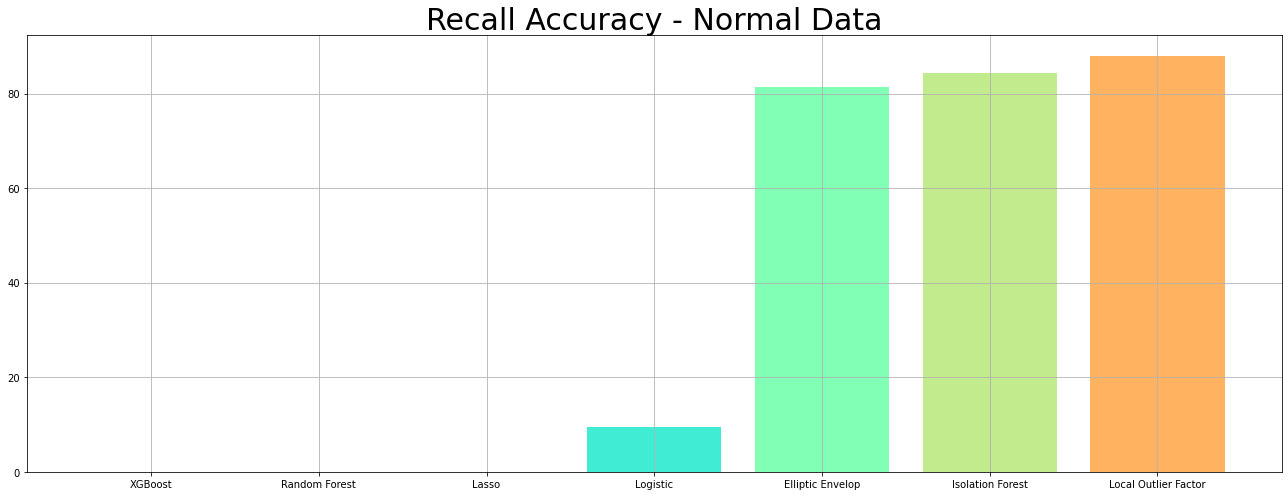

In [35]:
Recall = np.array([84.4, 87.9, 81.3,9.4,0,0,0])
label = np.array(['Isolation Forest', 'Local Outlier Factor', 'Elliptic Envelop',
                  'Logistic','XGBoost','Random Forest','Lasso'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Normal Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

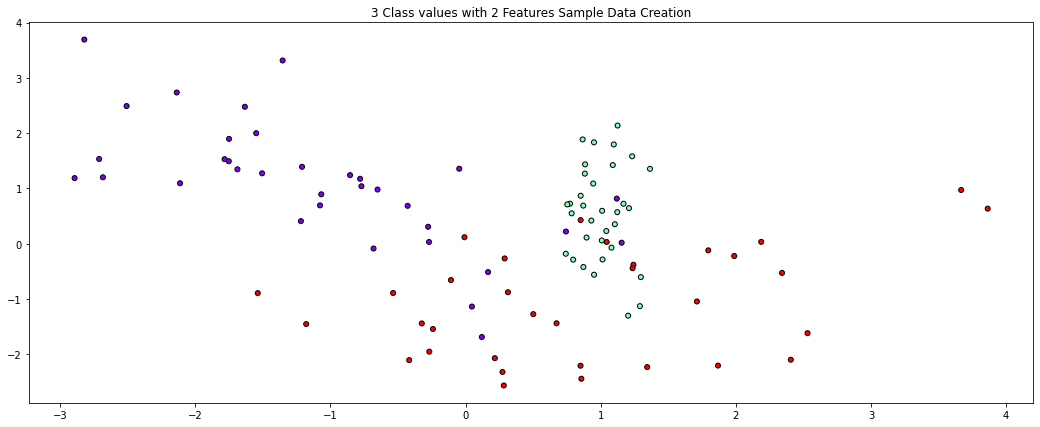

In [36]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')